# Filtro Digital IIR - Notch

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib as mpl
import scipy.signal as sig
import warnings
#import mpld3
#mpld3.enable_notebook()
warnings.filterwarnings("ignore")

### Construccion de los sistemas con y sin pre-warping

In [2]:
# Frecuencia central del Notch
w0=2*2*np.pi # --> esta es la frecuencia a la que se desea que este centrado el Notch 
T=2*np.pi/(4*w0)
Fs=1/T

# Frecuencia central del Notch con pre-warping
w1=(2/T)*np.tan(w0*T/2)

# Coficientes del sistema
a=[1,w0/0.5,w0**2]
b=[1,0,w0**2]

# Coficientes del sistema con pre-warping
a1=[1,w1/0.5,w1**2]
b1=[1,0,w1**2]

# Construccion de los sistemas
z, p = sig.bilinear(b, a, Fs)
sys_dig_IIR = sig.dlti(z,p)
Omega_IIR = np.arange(1/1000,np.pi,0.001)
z1, p1 = sig.bilinear(b1, a1, Fs)
sys_dig_IIR1 = sig.dlti(z1,p1)

### Respuesta en frecuencia

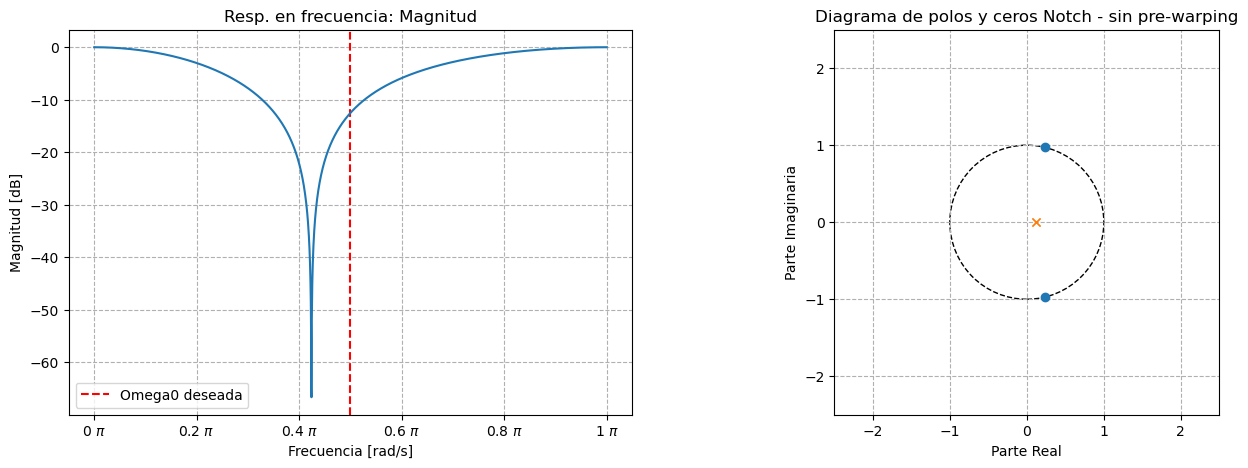

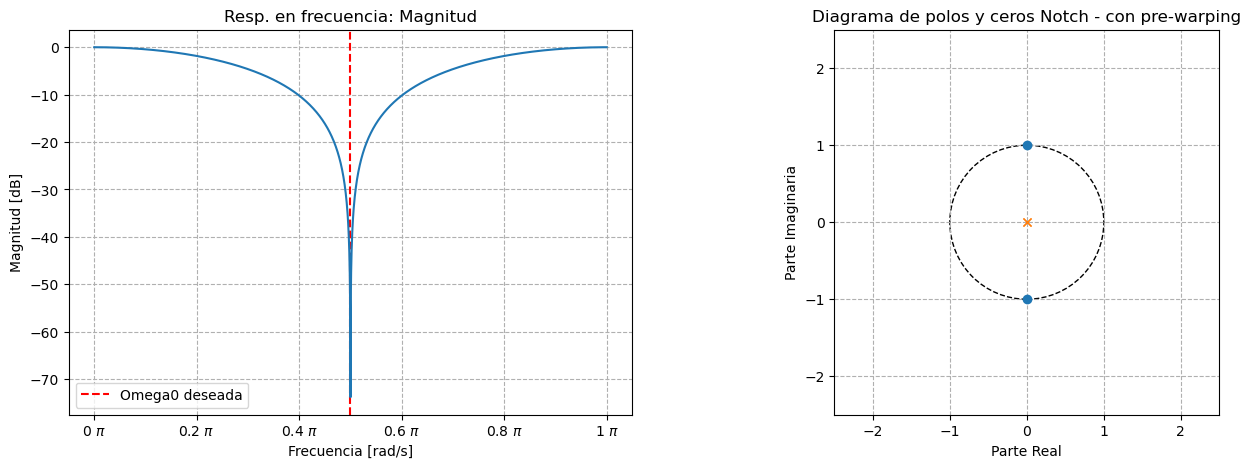

In [23]:
# Respuesta en frecuencia
Omega_log_IIR, mag_dB_IIR, fase_IIR = sig.dbode(sys_dig_IIR, w=Omega_IIR)
Omega_log_IIR1, mag_dB_IIR1, fase_IIR1 = sig.dbode(sys_dig_IIR1, w=Omega_IIR)

fig1, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.axvline(x = w0*np.pi/((Fs*np.pi))/np.pi, color = 'r', linestyle = '--', label='Omega0 deseada')
ax1.plot(Omega_IIR/np.pi,mag_dB_IIR)
ax1.set_title("Resp. en frecuencia: Magnitud")
ax1.set_xlabel("Frecuencia [rad/s]")  
ax1.set_ylabel("Magnitud [dB]")
ax1.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax1.grid(linestyle='--', which="both")
ax1.legend()

ax2.plot(sys_dig_IIR.zeros.real, sys_dig_IIR.zeros.imag, 'o')#ceros
ax2.plot(sys_dig_IIR.poles.real, sys_dig_IIR.poles.imag, 'x')#polos
circulo_unitario = mpl.patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
ax2.add_patch(circulo_unitario)
ax2.set_xlim(-2.5,2.5)
ax2.set_ylim(-2.5,2.5)
ax2.grid(linestyle='--')
ax2.set_title("Diagrama de polos y ceros Notch - sin pre-warping")
ax2.set_xlabel("Parte Real")
ax2.set_ylabel("Parte Imaginaria")
ax2.set_aspect('equal')

plt.show()
fig1, (ax3,ax4) = plt.subplots(1, 2, figsize=(16, 5))

ax3.axvline(x = w0*np.pi/((Fs*np.pi))/np.pi, color = 'r', linestyle = '--', label='Omega0 deseada')
ax3.plot(Omega_IIR/np.pi,mag_dB_IIR1)
ax3.set_title("Resp. en frecuencia: Magnitud")
ax3.set_xlabel("Frecuencia [rad/s]")  
ax3.set_ylabel("Magnitud [dB]")
ax3.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax3.grid(linestyle='--', which="both")
ax3.legend()

ax4.plot(sys_dig_IIR1.zeros.real, sys_dig_IIR1.zeros.imag, 'o')#ceros
ax4.plot(sys_dig_IIR1.poles.real, sys_dig_IIR1.poles.imag, 'x')#polos
circulo_unitario = mpl.patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
ax4.add_patch(circulo_unitario)
ax4.set_xlim(-2.5,2.5)
ax4.set_ylim(-2.5,2.5)
ax4.grid(linestyle='--')
ax4.set_title("Diagrama de polos y ceros Notch - con pre-warping")
ax4.set_xlabel("Parte Real")
ax4.set_ylabel("Parte Imaginaria")
ax4.set_aspect('equal')

plt.show()

### A que se deben las diferencias entre los sistemas?